In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [4]:
# load example data
data_x, data_y = load_whas500()

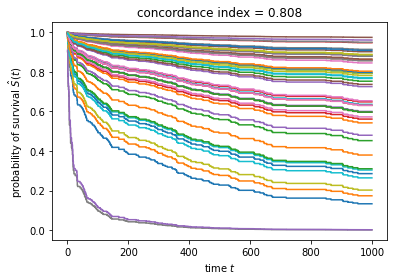

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
data_x, data_y, test_size=50, random_state=2020)
# combine feature transform and Cox model
pipeline = make_pipeline(
OneHotEncoder(), CoxPHSurvivalAnalysis())
# fit the model
pipeline.fit(X_train, y_train)
# compute concordance index on held-out data
c_index = pipeline.score(X_test, y_test)
# plot estimated survival functions
surv_fns = pipeline.predict_survival_function(X_test)
time_points = np.arange(1, 1000)
for surv_func in surv_fns:
    plt.step(time_points, surv_func(time_points),where="post")
plt.ylabel("probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title("concordance index = %.3f" % c_index)
plt.show()